In [1]:
import matplotlib.pyplot as plt
import numpy as np
import dataToVar as dat
from playsound import playsound

In [2]:

def r2(y,fit):
    st = sum((y-np.average(y))**2)
    sr = sum((y-fit)**2)
    r2 = 1-sr/st
    return r2


1.0
-0.004822680890538048 0.7402680890538081 -18.67443413729152


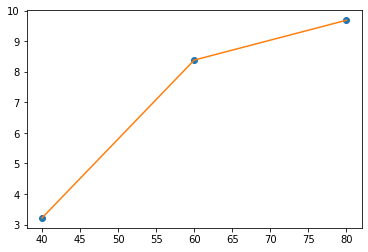

In [7]:
def r2surf(zlist,zlistfit):
    zlist = np.array(zlist)
    zlistfit = np.array(zlistfit)
    st = sum((zlist-np.average(zlist))**2)
    sr = sum((zlist-zlistfit)**2)
    r2 = 1-sr/st
    return r2


eig = dat.cool100_80
six = dat.cool100_60
fou = dat.cool100_40


# print(fif[0][1])

a = 80 - np.average(eig[2][-10:])
b = 60 - np.average(six[2][-10:])
c = 40 - np.average(fou[2][-10])

xx = np.array([80,60,40])
yy = np.array([a,b,c])
aa,bb,cc = np.polyfit(xx,yy,2)
plt.plot(xx,yy,'o')
plt.plot(xx,aa*xx**2+bb*xx+cc)

;
print(r2(yy,aa*xx**2+bb*xx+cc))
print(aa,bb,cc)
# aa = 0.001783387081181651
# bb = -0.12568814551147064
# cc = 4.697092470876827


In [8]:
therm = 58
print(aa*therm**2+bb*therm+cc)

8.037616512059362


In [4]:
rr = {}
# set = [50,70,90,100]

shortest = min(len(eig[1]),len(eig[2]),len(six[1]),len(six[2]),len(fou[1]),len(fou[2]))
ytot = [eig[2][:shortest],six[2][:shortest],fou[2][:shortest]]
xtot = [eig[1][:shortest],six[1][:shortest],fou[1][:shortest]]

zlist = []
for i in ytot:
    for j in i:
        zlist.append(j)

big = np.arange(0,1,0.1)
for i in big:
    zlistfit = []
    for j in range(len(ytot)):
        old = ytot[j][0]
        # ans = []
       

        for k in xtot[j]:
            if str(k) == 'nan':
                print('fix csv')
                break
            else:
                offset = aa*k**2+bb*k+cc
                old = old*i+(k-offset)*(1-i)
                zlistfit.append(old)
        

    r = r2surf(zlist,zlistfit)
    if r >0 and r<1:
        rr[r] = i

# print(rr)
print(max(rr)) 
   
trust = rr[max(rr)] 
print(trust)
trust = .9992

0.345273093398506
0.9


''

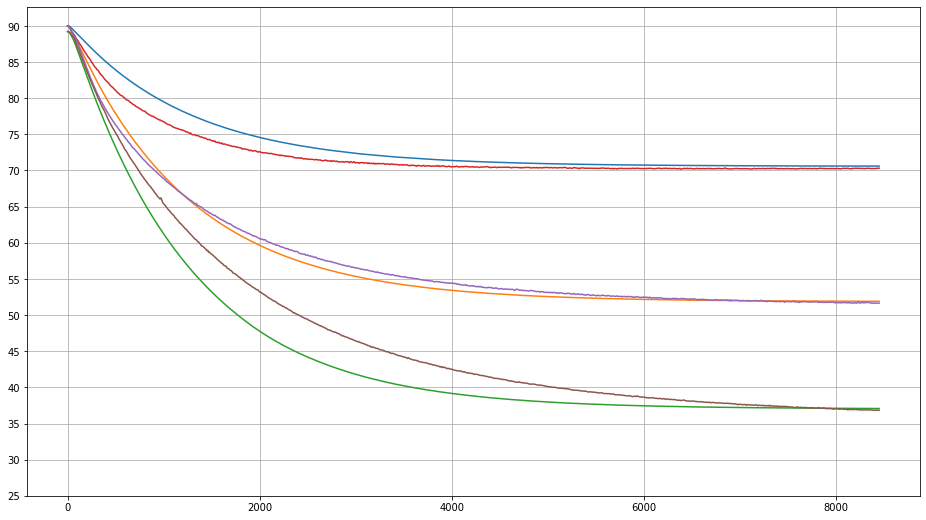

In [5]:
plt.figure(figsize=(16,9))
for j in range(len(ytot)):
    old = ytot[j][0]
    ans = []
 
    for k in xtot[j]:
        offset = aa*k**2+bb*k+cc
        old = old*trust+(k-offset)*(1-trust)
        ans.append(old)
    plt.plot(ans)

for i in ytot:
    plt.plot(i) 
plt.grid()
plt.yticks(np.arange(25,95,5))
;

In [6]:
# import required module


# for playing note.wav file
playsound('mixkit-doorbell-tone-2864.wav')
